<img src="https://fcw.com/~/media/GIG/EDIT_SHARED/Federal%20programs/populationmap.jpg" style="float: left; margin: 10px; height: 207px">
<font color='104E8B'>
# Predicting Income Bracket - United States Census Dataset
</font> 
**Problem Statement:** Can we predict the income bracket of a census sample of people based on demographics,  ethnic distribution, transportation used, commuting time to work, and industries worked in?

Author :  **Abhinav Jha** <br>
Project:  **Final Project (Unit 4)** <br>
Course: **General Assembly - Data Science Part Time**



## Table of Contents
----

- [Introduction to Data Set + Data Preparation](#data-prep)
    - [Import Basic Modules](#import-mod)
    - [Read Data](#rows)
    - [Feature Check](#shape)
    - [Data Cleaning](#cleaning)
    - [Outlier Removal](#outlier)
    - [Setting Target Variable Class](#value)
- [Data Analysis](#analysis)
    - [Heatmap & Feature Set](#selection)
    - [Data Visualization - Features and Target Variable](#viz)
        - [Pair Plot](#pair)
        - [Box Plot](#box)
        - [Plotly Map](#plotly)
- [Data Preparation for Machine Learning](#learning)
    - [Combining Numerical and Catagorical Feature Sets](#dummies)
    - [Train Test Split, Holdout Method or K-Fold Cross Validation](#ttt)
    - [Standard Scaling](#scalar)
    - [Class Imbalance](#imb)
    - [Confusion Matrix Preparation (for Section 4)](#conf)
- [Machine Learning Classification Models](#models)
    - [K-neighbors](#classification)
    - [Logistic Regression](#log)
    - [Decision Trees](#dec)
    - [Random Forests](#ran)
    - [Extra-Trees](#ext)
- [Grid Search: Hyper-Parameter Tuning](#grid)
    - [Logistic Regression](#log2)
    - [Random Forest](#ran2)
- [Conclusion](#conc)
- [Discussion](#disc)

<a id="data-prep"></a>
# Introduction to Data Set + Data Preparation
----
<a id="import-mod"></a>
### **Import Basic Modules**
- Pandas, Numpy, Seaborn, Sklearn, Matplotlib
- Color class created for printing to output window

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
plotly_api_key = 'smcsYmInc6B4P7R4xfKB'

<a id="rows"></a>
### **Read data into Pandas DataFrame and Print the first 5 rows**
- Data is read into a Pandas DataFrame
- Data is randomized to eliminate order bias

In [4]:
census = pd.read_csv('./us-census-demographic-data/acs2015_census_tract_data.csv')
from sklearn.utils import shuffle
census = shuffle(census, random_state=11)
census.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
31261,25001014500,Massachusetts,Barnstable,5717,2922,2795,2.8,85.9,8.4,0.0,...,1.2,2.6,6.1,28.5,2573,70.2,15.5,14.2,0.0,7.0
22429,17037000400,Illinois,DeKalb,8707,4235,4472,9.9,85.1,1.3,0.4,...,0.0,0.5,3.8,27.8,4734,77.3,17.4,5.3,0.0,4.2
44973,36047098800,New York,Kings,3117,1448,1669,6.0,7.4,84.8,0.0,...,8.6,1.7,1.4,41.8,1374,73.3,21.3,5.4,0.0,9.5
47201,36087012501,New York,Rockland,5600,2668,2932,11.1,74.3,10.8,0.0,...,2.3,3.2,5.5,37.1,2270,77.5,15.8,6.7,0.0,7.6
45433,36059411302,New York,Nassau,6824,3330,3494,4.2,94.2,0.7,0.0,...,0.3,0.8,6.5,48.6,2753,80.2,11.1,8.6,0.0,6.5


<a id="shape"></a>
### **Features Available & DataFrame Shape**
- Prints the features and shape of the data set

In [5]:
feat = ''
for i in census.dtypes.index:
    feat = feat + ', ' + i
print(color.BOLD + 'Features Available: ' + color.END + feat)
print('')
print(color.BOLD + 'DataFrame Shape: ' + color.END + str(census.shape[0]) + ' x ' + str(census.shape[1]))

Features Available: , CensusTract, State, County, TotalPop, Men, Women, Hispanic, White, Black, Native, Asian, Pacific, Citizen, Income, IncomeErr, IncomePerCap, IncomePerCapErr, Poverty, ChildPoverty, Professional, Service, Office, Construction, Production, Drive, Carpool, Transit, Walk, OtherTransp, WorkAtHome, MeanCommute, Employed, PrivateWork, PublicWork, SelfEmployed, FamilyWork, Unemployment

DataFrame Shape: 74001 x 37


<a id="cleaning"></a>
### **Data Cleaning**
- Removal of all rows containing `NaN`
    - `NaN` values need not be backfilled or filled with sample values since data set is large enough
- Removal of duplicates
- Prints new DataFrame shape

In [6]:
census.dropna(axis=0, inplace=True)
census.drop_duplicates(inplace=True)
print(color.BOLD + 'New DataFrame Shape: ' + color.END + str(census.shape[0]) + ' x ' + str(census.shape[1]))

New DataFrame Shape: 72727 x 37


<a id="outlier"></a>
### Removal of Outliers
- Incomes greater than `$220000`
- Incomes less than `$0`
- Prints new DataFrame shape

In [7]:
plt_census = census
census = census[census.Income<=220000]
census = census[census.Income>=0]
print(color.BOLD + 'New DataFrame Shape: ' + color.END + str(census.shape[0]) + ' x ' + str(census.shape[1]))

New DataFrame Shape: 72690 x 37


<a id="values"></a>
### Target Variable (Income) to Categorical Values
- USD 25000 and Below    - **Low**       (1)
- USD 25000 to USD 55000 - **Medium**    (2)
- USD 55000 to USD 90000 - **High**      (3)
- USD 90000 and Above    - **Very High** (4)

In [8]:
mask1 = census.Income <= 30000
mask2 = (census.Income > 30000) & (census.Income <= 55000)
mask3 = (census.Income > 55000) & (census.Income <= 90000)
mask4 = census.Income > 90000 
census.Income.where(~mask1, other=1, inplace=True)
census.Income.where(~mask2, other=2, inplace=True)
census.Income.where(~mask3, other=3, inplace=True)
census.Income.where(~mask4, other=4, inplace=True)
census['Income'] = census['Income'].astype(int)

<a id="analysis"></a>
# Data Analysis
----
<a id="selection"></a>
### Use of Heatmap for Feature Selection
- All features available printed onto this heatmap with Target variable (Income) as the last feature
- Goal is to identify features with high correlation and eliminate them

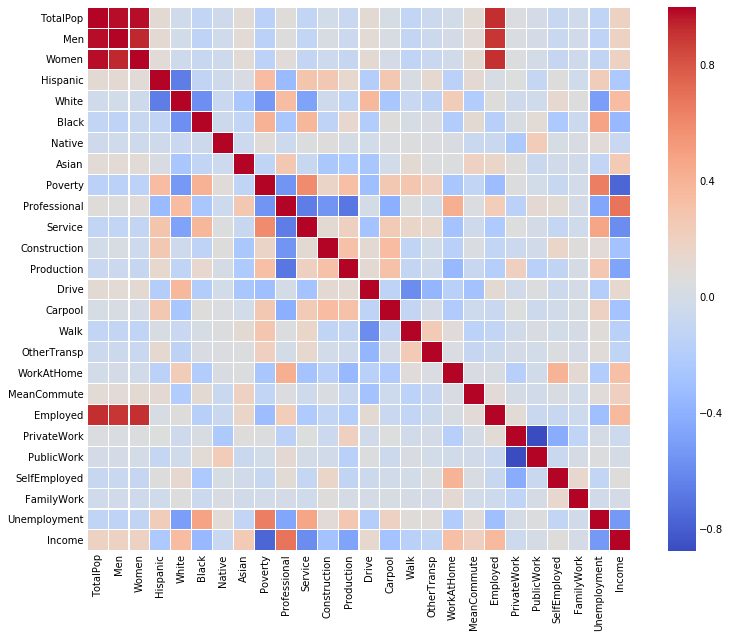

In [9]:
all_features = ['TotalPop','Men','Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Poverty' , 'Professional', 'Service', 'Construction', 'Production', 'Drive', 'Carpool', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'Income']
num_features = ['TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Poverty' , 'Professional', 'Service', 'Construction', 'Production', 'Drive', 'Carpool', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'Income']

plt.figure(figsize=(12,10))
sns.heatmap(census[all_features].corr(), cmap='coolwarm' , linewidths=0.05, linecolor='white', square=True)

<a id="set"></a>
### Narrowing Down Feature Set
- Selection of 7 features with the highest correlation with the target variable
- Chosen using an annotated heatmap that prints out the correlation coefficients

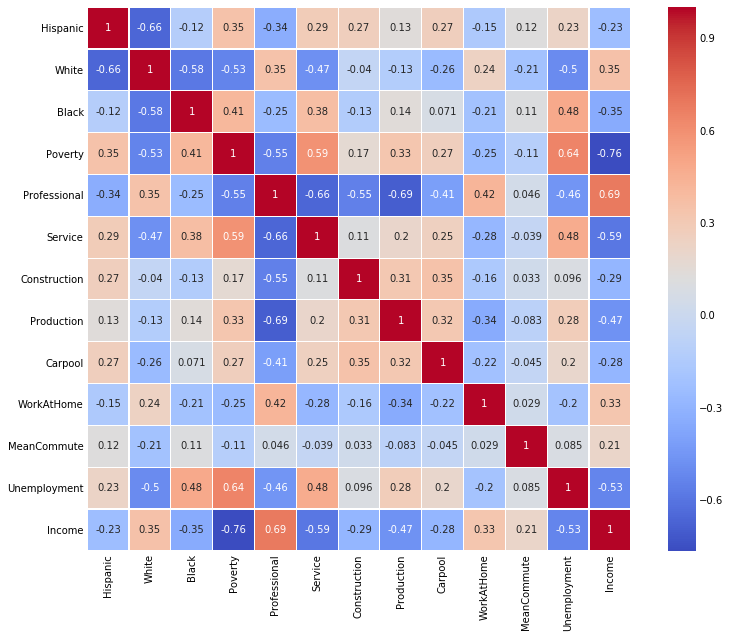

In [10]:
num_features_used = ['Hispanic', 'White', 'Black', 'Poverty' , 'Professional', 'Service', 'Construction', 'Production', 'Carpool', 'WorkAtHome', 'MeanCommute', 'Unemployment', 'Income']
num_census1 = census[num_features_used]

plt.figure(figsize=(12,10))
sns.heatmap(num_census1.corr(), cmap='coolwarm' , linewidths=0.05, linecolor='white', square=True, annot=True)

# Remove Income from Feature Data Set
num_features_used = ['White', 'Poverty' , 'Professional', 'Service', 'Production', 'MeanCommute', 'Unemployment']
num_census = census[num_features_used]
num_features_used1 = ['White', 'Poverty' , 'Professional', 'Service', 'Production', 'MeanCommute', 'Unemployment', 'Income']

<a id="viz"></a>
### Data Visualization
<a id="pair"></a>
#### 1. Pair Plots
- Visualization of how each feature is related to each other and target variable (Income)
    - Target Variable (Income) is color encoded - **see Legend** on the right
- Helps us decide which statistical model fits the problem statement

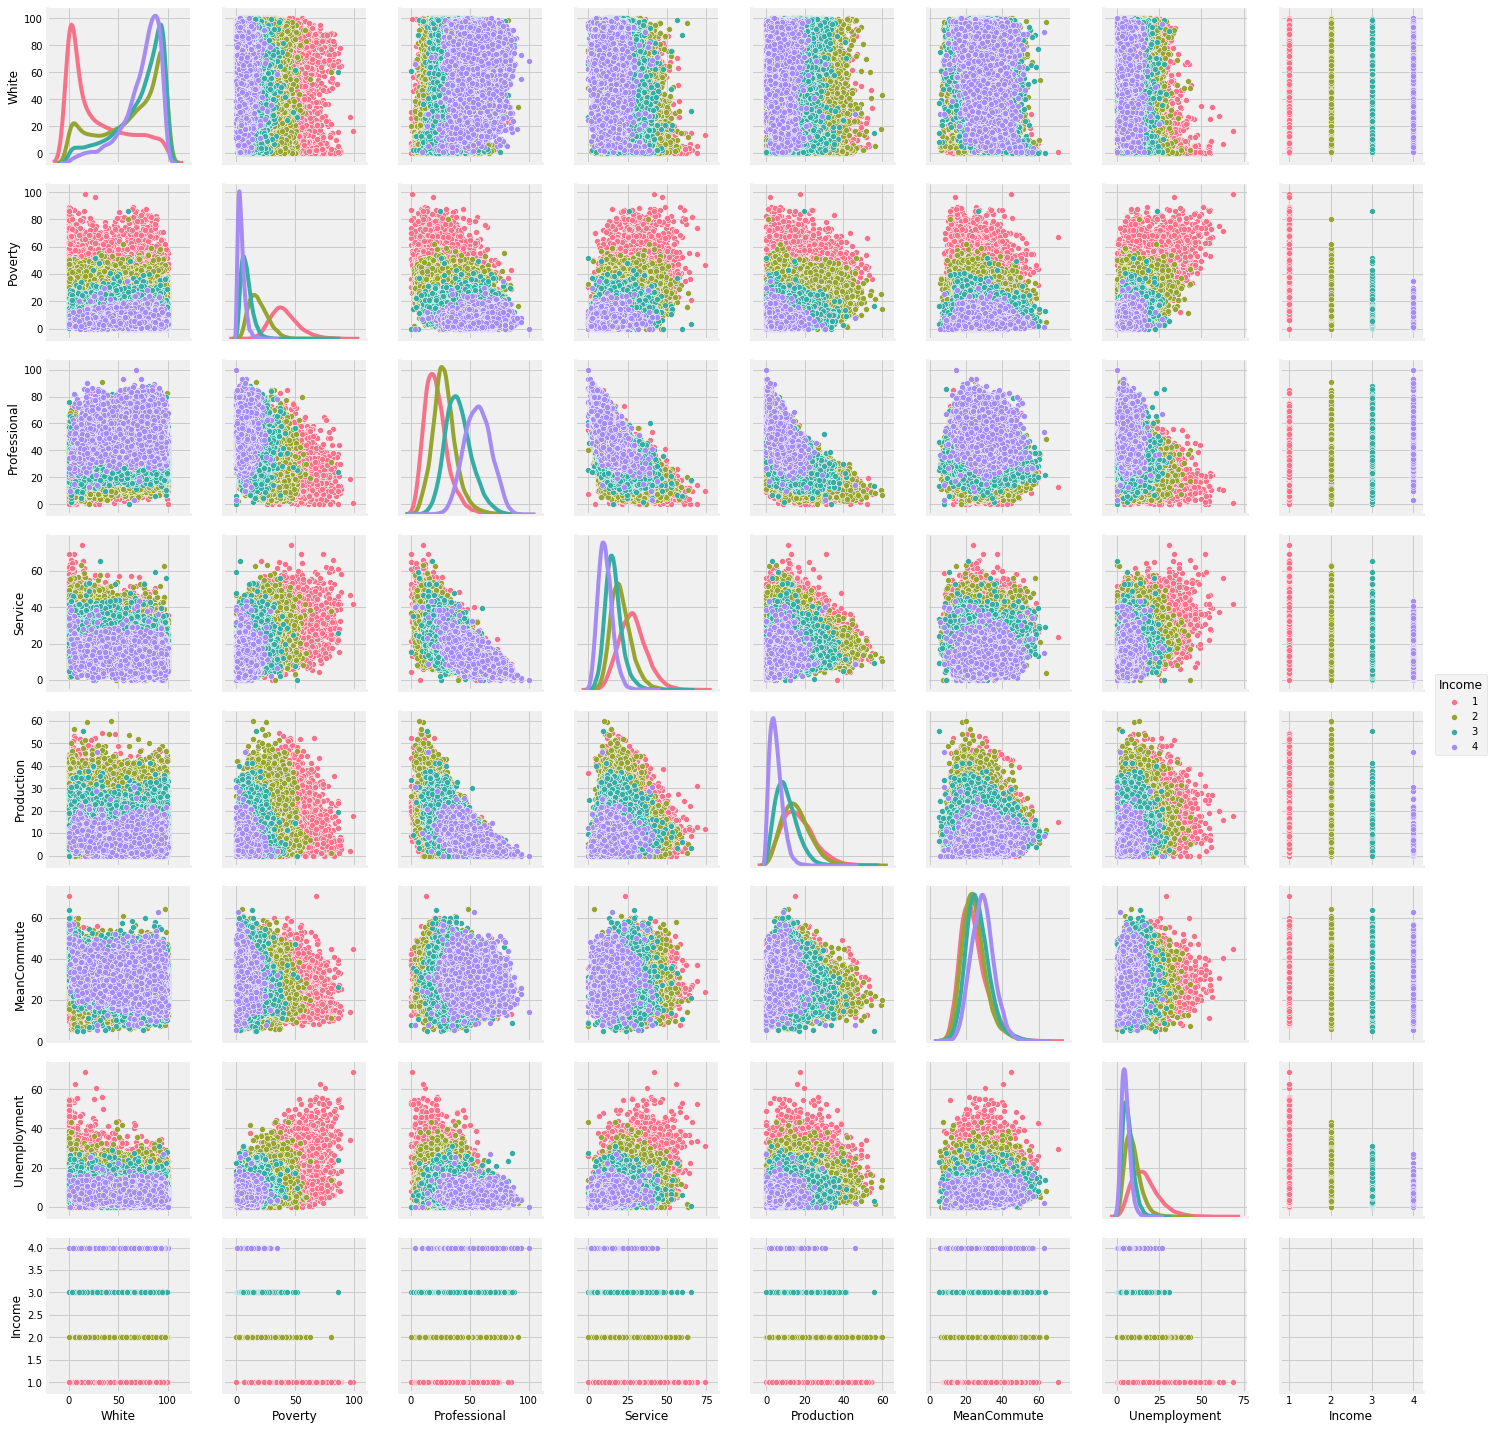

In [9]:
sns.pairplot(census[num_features_used1], hue='Income', palette="husl", diag_kind="kde")

<a id="box"></a>
#### 2. Box Plots
- Whether or not feature data is skewed
- Potential need for removal of outliers depending on problem statement

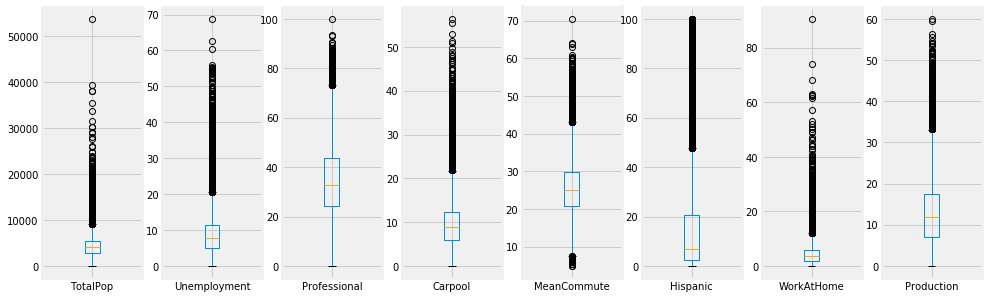

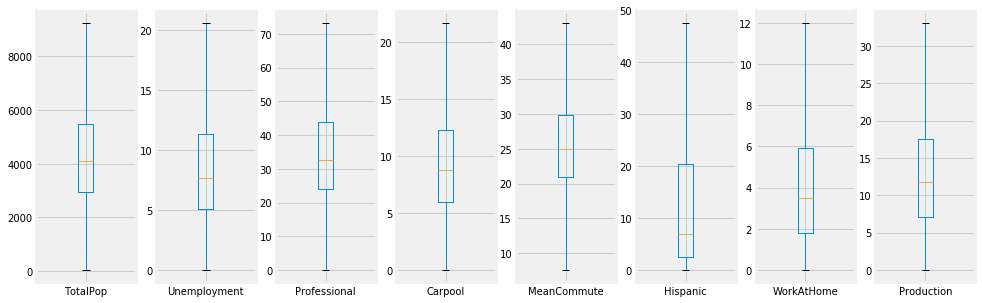

In [10]:
plt.subplots(figsize=(15,5), squeeze=False)
sv = True
plt.subplot(1,8,1)
census.TotalPop.plot.box(showfliers=sv)
plt.subplot(1,8,2)
census.Unemployment.plot.box(showfliers=sv)
plt.subplot(1,8,3)
census.Professional.plot.box(showfliers=sv)
plt.subplot(1,8,4)
census.Carpool.plot.box(showfliers=sv)
plt.subplot(1,8,5)
census.MeanCommute.plot.box(showfliers=sv)
plt.subplot(1,8,6)
census.Hispanic.plot.box(showfliers=sv)
plt.subplot(1,8,7)
census.WorkAtHome.plot.box(showfliers=sv)
plt.subplot(1,8,8)
census.Production.plot.box(showfliers=sv)

plt.subplots(figsize=(15,5), squeeze=False)
sv = False
plt.subplot(1,8,1)
census.TotalPop.plot.box(showfliers=sv)
plt.subplot(1,8,2)
census.Unemployment.plot.box(showfliers=sv)
plt.subplot(1,8,3)
census.Professional.plot.box(showfliers=sv)
plt.subplot(1,8,4)
census.Carpool.plot.box(showfliers=sv)
plt.subplot(1,8,5)
census.MeanCommute.plot.box(showfliers=sv)
plt.subplot(1,8,6)
census.Hispanic.plot.box(showfliers=sv)
plt.subplot(1,8,7)
census.WorkAtHome.plot.box(showfliers=sv)
plt.subplot(1,8,8)
census.Production.plot.box(showfliers=sv)

<a id="plotly"></a>
#### 3. Plotly - Interactive Data Visualization
- Chloropleth Map module used from Plotly for better visualization of geographic trends
- Requires mapping of values from States to State Codes to DataFrame States
- Ability to hover over graph and interact with Income per Capita per State

In [11]:
import plotly
import plotly.plotly as py
import pandas as pd

plotly.tools.set_credentials_file(username='abhinavjha11', api_key=plotly_api_key)


df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
values = plt_census.groupby('State').Income.mean()
values.drop(['District of Columbia', 'Puerto Rico'], inplace=True)

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(type='choropleth', colorscale = scl, autocolorscale = False, locations = df['code'], z = values,  locationmode = 'USA-states', text = values, marker = dict( line = dict ( color = 'rgb(255,255,255)', width = 2 ) ), colorbar = dict( title = "Average Annual Income ($)") ) ]
layout = dict( title = 'USA State Level Average Income', geo = dict( scope='usa', projection=dict( type='albers usa' ), showlakes = True, lakecolor = 'rgb(255, 255, 255)'), )
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

<a id="learning"></a>
# Data Preparation for Machine Learning
----
<a id="dummies"></a>
### Feature Set & Use of Dummies
#### Adding a categorical Feature (State) to Features
- Use of dummies method in pandas
- New Matrix has been an expansion of columns
- One column dropped to prevent redundancy

In [12]:
dummies = pd.get_dummies(census.State)
census1 = pd.concat([dummies, num_census], axis=1)
census1.drop(columns=['Alabama'], inplace=True)
print(color.BOLD + 'The feature matrix has been expanded to: ' + str(census1.shape[0]) + ' x ' + str(census1.shape[1]) + color.END)
X = census1
Y = census.Income

The feature matrix has been expanded to: 72690 x 58


<a id="ttt"></a>
### Train Test Split, Holdout Method or K-Fold Cross Validation
- Chose Holdout Method due to property of having the best out-of-sample accuracy
- K was chosen as 5, relatively smaller value due to the complexity of 'State' feature
- Wanted to ensure that each training and testing set had enough datapoints of each **State** hence, chose smaller value of K
<img src="https://cdn-images-1.medium.com/max/948/1*4G__SV580CxFj78o9yUXuQ.png" style="float: center; margin: 20px; height: 300px">

In [13]:
from sklearn.cross_validation import cross_val_score as cvl
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.10, random_state=1)
print(color.BOLD + 'Split Verification:')
print('Training Set X Shape: \t' + str(X_train.shape))
print('Training Set y Shape: \t' + str(y_train.shape))
print('Testing Set X Shape: \t' + str(X_test.shape))
print('Testing Set X Shape: \t' + str(y_test.shape))

Split Verification:
Training Set X Shape: 	(65421, 58)
Training Set y Shape: 	(65421,)
Testing Set X Shape: 	(7269, 58)
Testing Set X Shape: 	(7269,)


<a id="scalar"></a>
### Standard Scaler
- To prevent biased weights to features
- Only applied to training set `X_train` & `X_test`
- Only 1 target variable makes `y_train` & `y_test` inherently unbiased

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
Xs = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

<a id="imb"></a>
### Class Imbalance
- Observed multi-class Imbalance
- Minority Classes:
    - Low Income Group: ~14%
    - High Income Group: ~14%

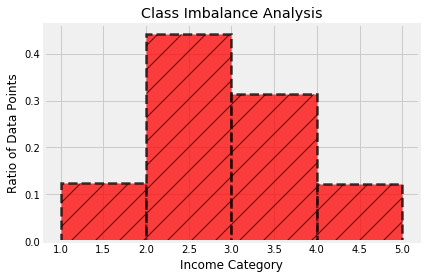

In [15]:
plt.hist(y_train,bins=[1,2,3,4,5], density=True, facecolor='red', alpha=0.75, align='mid', histtype='bar',linewidth=2.5, edgecolor='black', linestyle='--', hatch='/')
plt.xlabel('Income Category')
plt.ylabel('Ratio of Data Points')
plt.title('Class Imbalance Analysis')
plt.grid(True)
plt.show()

In [16]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek()
X_resampled, y_resampled = sm.fit_sample(X_train, y_train)

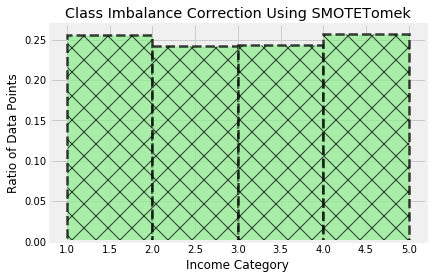

New shape of Feature Matrix: 112122 x 58
New shape of Target Variable: 112122


In [17]:
plt.hist(y_resampled, bins=[1,2,3,4,5], density=True, facecolor='lightgreen', alpha=0.75, linewidth=2.5, edgecolor='black', linestyle='--', hatch='x')
plt.xlabel('Income Category')
plt.ylabel('Ratio of Data Points')
plt.title('Class Imbalance Correction Using SMOTETomek')
plt.grid(True)
plt.show()
print(color.BOLD + 'New shape of Feature Matrix: ' + str(X_resampled.shape[0]) + ' x ' + str(X_resampled.shape[1]))
print(color.BOLD + 'New shape of Target Variable: ' + str(y_resampled.shape[0]))

<a id="conf"></a>
### Confusion Matrix Method
- **Initialized for use in machine learning models below**
- Helps us understand class recall

In [18]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<a id="models"></a>
# Machine Learning Models

<a id="classification"></a>
### 1. K-Neighbors Classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,150)
scores = []
recall = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_resampled, y_resampled)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_pred, y_test))
    recall.append(metrics.recall_score(y_pred, y_test, average='macro'))

**Note: Plot of Accuracy vs K follows a flipped Bias-Variance curve**
- Reason for this is OVERFITTING at low values of K and UNDERFITTING at high values of K
- Due to sheer volume of data points, underfitting has not been reached in the plot shown above

<img src="https://djsaunde.files.wordpress.com/2017/07/bias-variance-tradeoff.png?w=1100" style="float: left; margin: 10px; height: 220px">

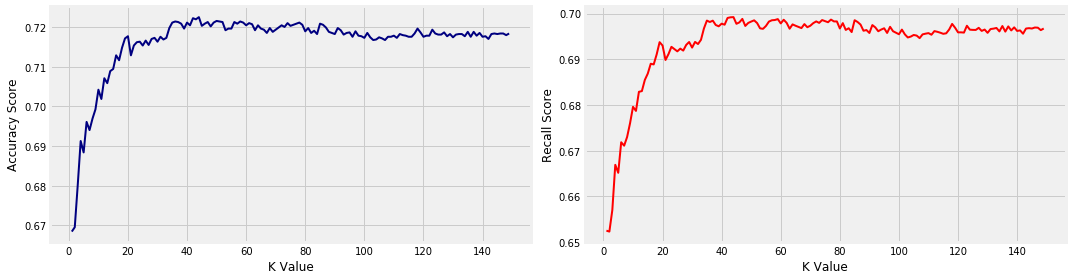

In [39]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(k_range,scores, linewidth=2, linestyle='-', color='navy')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

plt.subplot(1,2,2)
plt.plot(k_range,recall, linewidth=2, linestyle='-', color='red')
plt.xlabel('K Value')
plt.ylabel('Recall Score')
plt.tight_layout()

<a id="log"></a>
### 2. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf_log = LogisticRegression(C=100)
scores = cvl(clf_log, X_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=1)
print(color.BOLD + 'Accuracy Scores: ' + color.END + str(scores) + color.BOLD + ' Mean = ' + str(scores.mean()))
recall = cvl(clf_log, X_resampled, y_resampled, cv=5, scoring='f1_macro', n_jobs=1)
print(color.BOLD + 'Recall Scores: ' + color.END + str(recall) + color.BOLD + ' Mean = ' + str(recall.mean()))

# TRAIN-TEST-SPLIT Code
clf_log.fit(X_resampled,y_resampled)
y_pred = clf_log.predict(X_test)
print('Test Accuracy = ' + str(metrics.accuracy_score(y_test,y_pred)))
print('Test Recall = ' + str(metrics.recall_score(y_test,y_pred,average='macro')))

Accuracy Scores: [0.77 0.77 0.78 0.78 0.78] Mean = 0.7725733014681591
Recall Scores: [0.76 0.76 0.77 0.77 0.77] Mean = 0.7647085718592808
Test Accuracy = 0.6966570367313248
Test Recall = 0.767680739271464


Normalized confusion matrix
[[0.93 0.07 0.   0.  ]
 [0.18 0.64 0.18 0.01]
 [0.01 0.18 0.6  0.22]
 [0.   0.   0.1  0.9 ]]


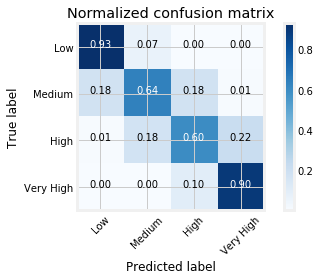

In [20]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(frameon=False)
plot_confusion_matrix(cnf_matrix, classes=['Low', 'Medium', 'High', 'Very High'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()

<a id="dec"></a>
### 3. Decision Trees

In [21]:
from sklearn.cross_validation import cross_val_score as cvl
import sklearn.cross_validation as cv
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
scores = cvl(clf_dt, X_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=1)
print(color.BOLD + 'Accuracy Scores: ' + color.END + str(scores) + color.BOLD + ' Mean = ' + str(scores.mean()))
recall = cvl(clf_dt, X_resampled, y_resampled, cv=5, scoring='f1_macro', n_jobs=1)
print(color.BOLD + 'Recall Scores: ' + color.END + str(recall) + color.BOLD + ' Mean = ' + str(recall.mean()))

clf_dt.fit(X_resampled,y_resampled)
y_pred = clf_dt.predict(X_test)
print('Test Accuracy = ' + str(metrics.accuracy_score(y_test,y_pred)))
print('Test Recall = ' + str(metrics.recall_score(y_test,y_pred,average='macro')))

Accuracy Scores: [0.73 0.78 0.81 0.83 0.84] Mean = 0.7986384049625324
Recall Scores: [0.73 0.78 0.81 0.82 0.84] Mean = 0.795572233445189
Test Accuracy = 0.6878525244187647
Test Recall = 0.6952595406497051


Normalized confusion matrix
[[7.36e-01 2.58e-01 6.44e-03 0.00e+00]
 [9.87e-02 7.15e-01 1.80e-01 6.19e-03]
 [4.48e-04 2.35e-01 6.20e-01 1.45e-01]
 [0.00e+00 1.84e-02 2.71e-01 7.10e-01]]


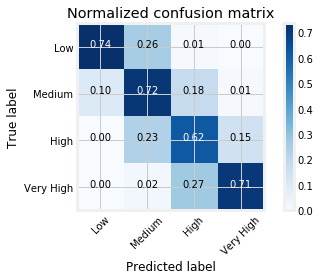

In [22]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(frameon=False)
plot_confusion_matrix(cnf_matrix, classes=['Low', 'Medium', 'High', 'Very High'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()

<a id="ran"></a>
### 4. Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier()
scores = cvl(clf_rfc, X_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=1)
print(color.BOLD + 'Accuracy Scores: ' + color.END + str(scores) + color.BOLD + ' Mean = ' + str(scores.mean()))
recall = cvl(clf_rfc, X_resampled, y_resampled, cv=5, scoring='f1_macro', n_jobs=1)
print(color.BOLD + 'Recall Scores: ' + color.END + str(recall) + color.BOLD + ' Mean = ' + str(recall.mean()))

clf_rfc.fit(X_resampled,y_resampled)
y_pred = clf_rfc.predict(X_test)
print('Test Accuracy = ' + str(metrics.accuracy_score(y_test,y_pred)))
print('Test Recall = ' + str(metrics.recall_score(y_test,y_pred,average='macro')))

Accuracy Scores: [0.8  0.83 0.86 0.87 0.88] Mean = 0.8481754124254884
Recall Scores: [0.8  0.83 0.85 0.87 0.88] Mean = 0.8460037055249406
Test Accuracy = 0.7551245013069198
Test Recall = 0.7580469820686485


Normalized confusion matrix
[[0.82 0.18 0.   0.  ]
 [0.08 0.79 0.13 0.  ]
 [0.   0.21 0.69 0.1 ]
 [0.   0.01 0.26 0.73]]


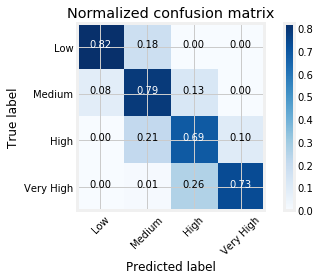

In [24]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(frameon=False)
plot_confusion_matrix(cnf_matrix, classes=['Low', 'Medium', 'High', 'Very High'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()

<a id="ext"></a>
### 5. Extra Trees Classifier

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
clf_etf = ExtraTreesClassifier()
scores = cvl(clf_etf, X_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=1)
print(color.BOLD + 'Accuracy Scores: ' + color.END + str(scores) + color.BOLD + ' Mean = ' + str(scores.mean()))
recall = cvl(clf_etf, X_resampled, y_resampled, cv=5, scoring='f1_macro', n_jobs=1)
print(color.BOLD + 'Recall Scores: ' + color.END + str(recall) + color.BOLD + ' Mean = ' + str(recall.mean()))

clf_etf.fit(X_resampled,y_resampled)
y_pred = clf_etf.predict(X_test)
print('Test Accuracy = ' + str(metrics.accuracy_score(y_test,y_pred)))
print('Test Recall = ' + str(metrics.recall_score(y_test,y_pred,average='macro')))

Accuracy Scores: [0.82 0.85 0.87 0.89 0.9 ] Mean = 0.8650896035044363
Recall Scores: [0.82 0.85 0.86 0.88 0.89] Mean = 0.8611880382947353
Test Accuracy = 0.7501719631311047
Test Recall = 0.7424763979243633


Normalized confusion matrix
[[7.85e-01 2.14e-01 1.07e-03 0.00e+00]
 [7.55e-02 8.00e-01 1.24e-01 9.28e-04]
 [4.48e-04 2.16e-01 6.83e-01 1.01e-01]
 [0.00e+00 6.90e-03 2.91e-01 7.02e-01]]


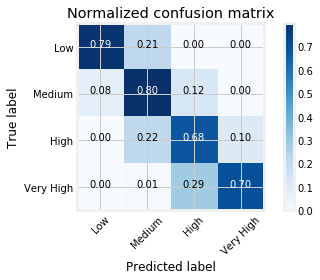

In [26]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(frameon=False)
plot_confusion_matrix(cnf_matrix, classes=['Low', 'Medium', 'High', 'Very High'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()

<a id="grid"></a>
# Grid Search: Hyper-Parameter Optimization
----
<a id="log2"></a>
## Logistic Regression
- Grid search was repeated for a number of variables and post tuning of the model with different and improved paramters each time, the last iteration of it is shown below.
- Paramters tuned:
    - `class_weight`
    - `C`
    - `dual`
    - `tol`

In [55]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression()
from sklearn.grid_search import GridSearchCV
param_grid = dict(C=[1,100,1000], dual=[False, True], tol=[0.0001,0.001,1,5],fit_intercept=[True,False],class_weight=[None,'balanced'])
grid = GridSearchCV(clf_log, param_grid,scoring='accuracy', cv=5)

In [56]:
grid.fit(X_resampled,y_resampled)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 100, 1000], 'dual': [False, True], 'tol': [0.0001, 0.001, 1, 5], 'fit_intercept': [True, False], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [57]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

LogisticRegression(C=100, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
{'C': 100, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'tol': 0.0001}
0.7710751020553683


In [60]:
clf_bestlog = LogisticRegression(C=100, class_weight='balanced', dual=False, fit_intercept=True, intercept_scaling=1)
clf_bestlog.fit(X_train,y_train)
y_pred = clf_bestlog.predict(X_test)
print('Test Accuracy = ' + str(metrics.accuracy_score(y_test,y_pred)))
print('Test Recall = ' + str(metrics.recall_score(y_test,y_pred,average='macro')))

Test Accuracy = 0.7390287522355207
Test Recall = 0.7609261723046444


Normalized confusion matrix
[[0.83 0.16 0.   0.  ]
 [0.1  0.76 0.14 0.  ]
 [0.   0.21 0.64 0.14]
 [0.   0.   0.19 0.81]]


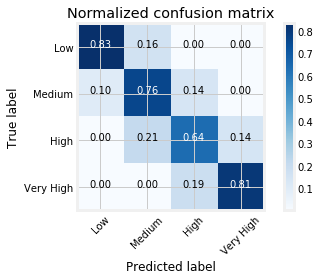

In [61]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(frameon=False)
plot_confusion_matrix(cnf_matrix, classes=['Low', 'Medium', 'High', 'Very High'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()

<a id="ran2"></a>
## Random Forest
- Grid search was repeated for a number of variables and post repeated tuning of the model, in the last iteration `param_grid` has been minimized in scope to reduce computation.
- Paramters tuned prior:
    - `n_estimators`
    - `min_samples_split`
    - `min_leaf_split`

In [22]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf_rfc = RandomForestClassifier()
param_grid = dict(n_estimators=[100, 1000], min_samples_split=[0.001,0.0001])
grid2 = GridSearchCV(clf_rfc, param_grid,scoring='accuracy',cv=5)

In [23]:
grid2.fit(X_resampled,y_resampled)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 1000], 'min_samples_split': [0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [24]:
print(grid2.best_estimator_)
print(grid2.best_params_)
print(grid2.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.0001,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
{'min_samples_split': 0.0001, 'n_estimators': 1000}
0.8593139615775673


In [26]:
from sklearn.ensemble import RandomForestClassifier
clf_final = RandomForestClassifier(n_estimators=1000, min_samples_split=0.0001)
clf_final.fit(X_train,y_train)
y_pred = clf_final.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred,average='macro'))

0.776172788554134
0.7488312488000718


Normalized confusion matrix
[[7.27e-01 2.71e-01 1.07e-03 0.00e+00]
 [3.84e-02 8.41e-01 1.20e-01 6.19e-04]
 [0.00e+00 1.99e-01 7.36e-01 6.49e-02]
 [0.00e+00 3.45e-03 3.06e-01 6.91e-01]]


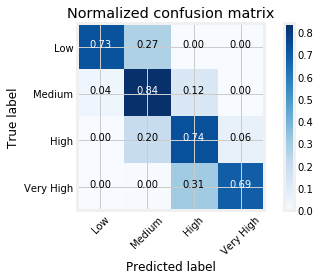

In [27]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(frameon=False)
plot_confusion_matrix(cnf_matrix, classes=['Low', 'Medium', 'High', 'Very High'], normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()

<a id="conc"></a>
# Conclusion
----

### Final Model Implemented: Random Forest
- **Reason:** Best possible balance of accuracy and recall (both minority and majority).

#### Pros and Cons of using Random Forest

**Advantages:**

>1.As we mentioned earlier a single decision tree tends to overfit the data. <br> 2.The process of averaging or combining the results of different decision trees helps to overcome the problem of overfitting. <br>3.Random forests also have less variance than a single decision tree. Works better for a large range of data items than single decision trees.<br>4.Random forests are extremely flexible and have very high accuracy.<br>5.They also do not require preparation of the input data.<br>6.You do not have to scale the data.<br>7.It also maintains accuracy even when a large proportion of the data is missing.

**Disadvantages:**

>1.The main disadvantage of Random forests is their complexity.<br>2.They are much harder and time-consuming to construct than decision trees.<br>3.They also require more computational resources and are also less intuitive.<br>4.When you have a large collection of decision trees it is hard to have an intuitive grasp of the relationship existing in the input data.<br>5.In addition, the prediction process using random forests is time-consuming than other algorithms.


<a id="disc"></a>
# Discussion
----
### Opportunities
- Overall an interesting way of creating a relationship between different indicators and income category.
- Implementation of schemes, policies and tax plans.

### Limitations
- Income category is relative to Purchasing Power Parity (PPP).
- Looking at precision as well as accuracy and recall.

### Improvements & Emerging Ideas
- Target individuals and not sample.
- **More data relevent to income?**
    - Number of Cars owned per Capita.
    - Distribution of Highest Education Level.
    - Type of Health Insurence owned.
    - Number of Credit Cards owned per Capita.
- Targeted sampling from Individuals of High and Very High Income Categories.
- Capture PPP along with income to give a more accurate prediction of Income Category.
- Use a regression problem predict the exact income.

#### Acknowledgements: <br> Yeo Wee Kiang, Melvin Perera, Bernard Yeo & Andre Tenreino